# vanilla average image

都使用proportion

In [5]:
import os
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np
from torchvision import datasets
import matplotlib.pyplot as plt
from utils import show_img

In [6]:
dataset = datasets.MNIST(
    root="./datasets",#路径
    train=True,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)

classified_data = []
for i in range(10):
    cls_data = []
    for (data, label) in dataset:
        if label==i:
            cls_data.append(data.numpy())
    classified_data.append(np.array(cls_data))
classified_data = np.array(classified_data,dtype=object)
print(classified_data.shape)

average_data = []
for i in range(classified_data.shape[0]):
    average_data.append(classified_data[i].mean(axis=0))
average_data = np.array(average_data)
print(average_data.shape)
save_path = './results'
model_name_list = ['alexnet_mnist','vgg11_mnist']
for model_name in model_name_list:
    np.save(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data.npy'),average_data)

(10,)
(10, 1, 28, 28)


In [7]:
mean_channel = np.zeros((10))
pixel_num = 28*28
for i in range(10):
    for j in range(classified_data[i].shape[0]):
        mean_channel[i] += np.abs(classified_data[i][j]).sum()/pixel_num
    mean_channel[i] /= classified_data[i].shape[0]

for i in range(10):
    print((mean_channel[i]/np.abs(average_data[i]).mean()))
    average_data[i] *= (mean_channel[i]/np.abs(average_data[i]).mean())
np.save(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data_proportion.npy'),average_data)

0.9999924280694115
0.9999919857748689
0.9999939808988558
0.9999934986918416
0.9999950966043428
0.9999962597087593
0.9999937381975711
0.9999935975962283
0.9999938969837318
0.9999947014257664


MNIST:  (10, 1, 28, 28)
MNIST proportion:  (10, 1, 28, 28)


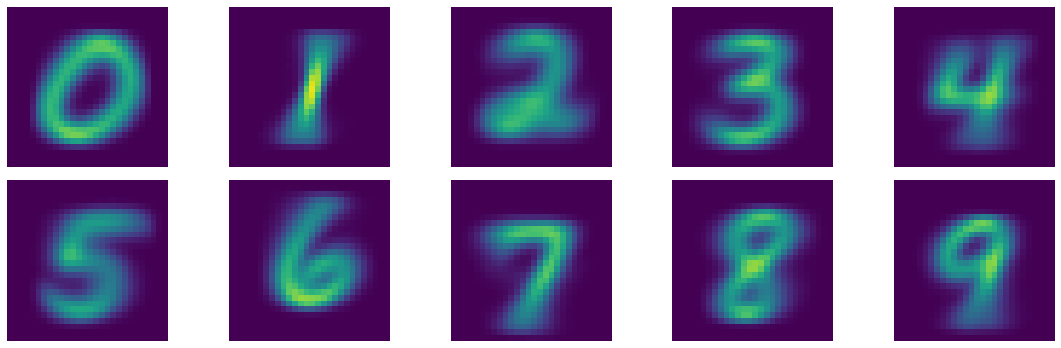

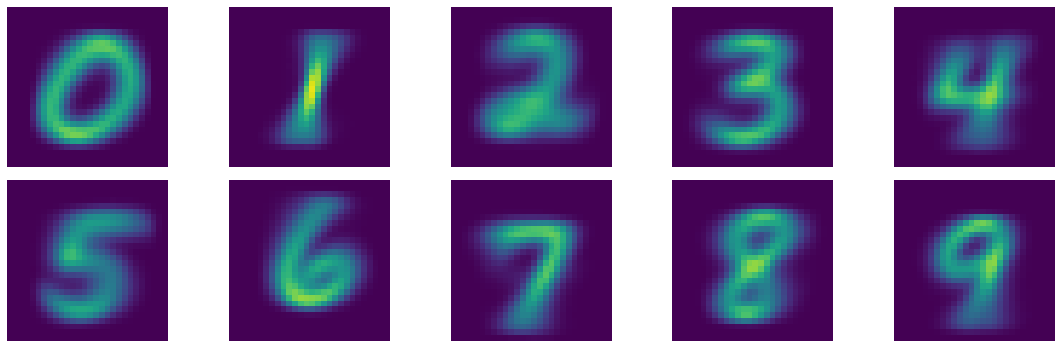

In [8]:
ave_data = np.load(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data.npy'), allow_pickle=True)
print('MNIST: ',ave_data.shape)
figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
for i in range(10):
    show_img(ave_data[i], transpose=True, axis=axes[i//5][i-i//5*5])#
ave_data = np.load(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data_proportion.npy'), allow_pickle=True)
print('MNIST proportion: ',ave_data.shape)
figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
for i in range(10):
    show_img(ave_data[i], transpose=True, axis=axes[i//5][i-i//5*5])#

In [9]:
dataset = datasets.CIFAR10(
    root="./datasets",#路径
    train=True,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)

classified_data = []
for i in range(10):
    cls_data = []
    for (data, label) in dataset:
        if label==i:
            cls_data.append(data.numpy())
    classified_data.append(cls_data)
    
classified_data = np.array(classified_data)
ave_data = classified_data.mean(axis=1)
save_path = './results'
model_name_list = ['alexnet_cifar','vgg11_cifar']
for model_name in model_name_list:
    np.save(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data.npy'),ave_data)

In [10]:
mean_channel = np.zeros((10, 3))
pixel_num = 32*32
for i in range(10):
    for j in range(5000):
        for channel in range(3):
            mean_channel[i,channel] += np.abs(classified_data[i][j][channel]).sum()/pixel_num
mean_channel /= 5000

for i in range(10):
    for channel in range(3):
        print((mean_channel[i,channel]/np.abs(ave_data[i,channel]).mean()))
        ave_data[i,channel] *= (mean_channel[i,channel]/np.abs(ave_data[i,channel]).mean())
np.save(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data_proportion.npy'),ave_data)

1.0000002931614265
1.0000009624995134
1.0000009097350862
0.9999985767730849
0.9999982256602366
0.9999980000302555
0.9999996014347751
0.9999996950319922
0.9999976278086358
0.9999995995657911
0.9999985420855733
0.999997372133011
0.9999993886788558
0.9999990096241255
0.9999961061952586
0.9999999329109958
0.999998972069073
0.9999974677885143
0.9999990577650816
0.9999981148027826
0.9999946753688289
0.9999997710048345
0.999999211443454
0.9999972396402107
0.9999995107743747
1.0000003673881317
1.0000007649681273
0.9999990373915345
0.999998639683429
0.9999981890782783


CIFAR-10  (10, 3, 32, 32)
CIFAR-10 proportion (10, 3, 32, 32)


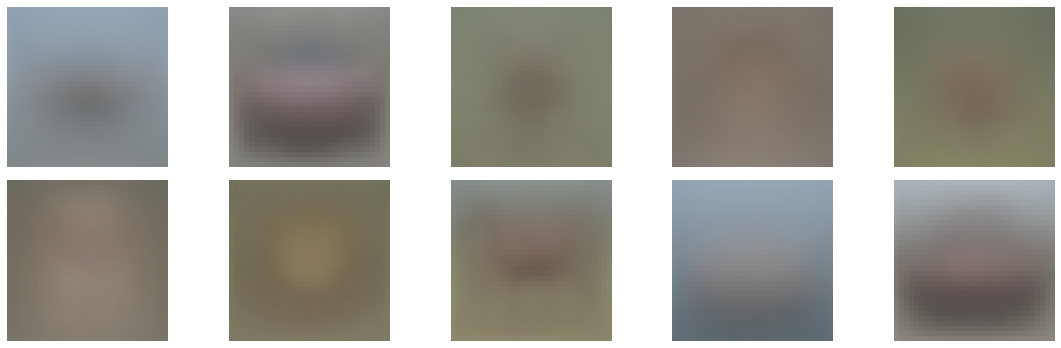

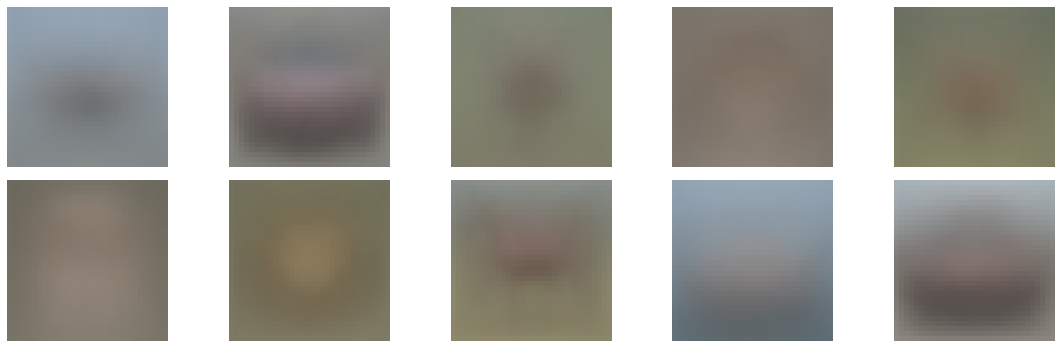

In [11]:
ave_data = np.load(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data.npy'), allow_pickle=True)
print('CIFAR-10 ',ave_data.shape)
figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
for i in range(10):
    show_img(ave_data[i], transpose=True, axis=axes[i//5][i-i//5*5])
ave_data = np.load(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data_proportion.npy'), allow_pickle=True)
print('CIFAR-10 proportion',ave_data.shape)
figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
for i in range(10):
    show_img(ave_data[i], transpose=True, axis=axes[i//5][i-i//5*5])

In [12]:
data_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

train_dataset =torchvision.datasets.ImageFolder(root='./datasets/ImageNet/train',transform=data_transform)
ave_data = np.zeros((10,3,224,224))
mean_channel = np.zeros((10, 3))
pixel_num = 224*224
for i in range(10):
    for j in range(1300):
        ave_data[i] += train_dataset[i*1300+j][0].numpy()
        for channel in range(3):
            mean_channel[i,channel] += train_dataset[i*1300+j][0][channel].abs().sum()/pixel_num
        if train_dataset[i*1300+j][1] != i:
            print('Error***************************')
ave_data /= 1300
mean_channel /= 1300
lists = ['alexnet_imagenet','vgg11_imagenet']
save_path = './results'
for model_name in lists:
    np.save(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data.npy'), ave_data)

In [13]:
for i in range(10):
    for channel in range(3):
        ave_data[i,channel] *= (mean_channel[i,channel]/np.abs(ave_data[i,channel]).mean())
lists = ['alexnet_imagenet','vgg11_imagenet']
for model_name in lists:
    np.save(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data_proportion.npy'), ave_data)

ImageNet:  (10, 3, 224, 224)
ImageNet proportion:  (10, 3, 224, 224)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


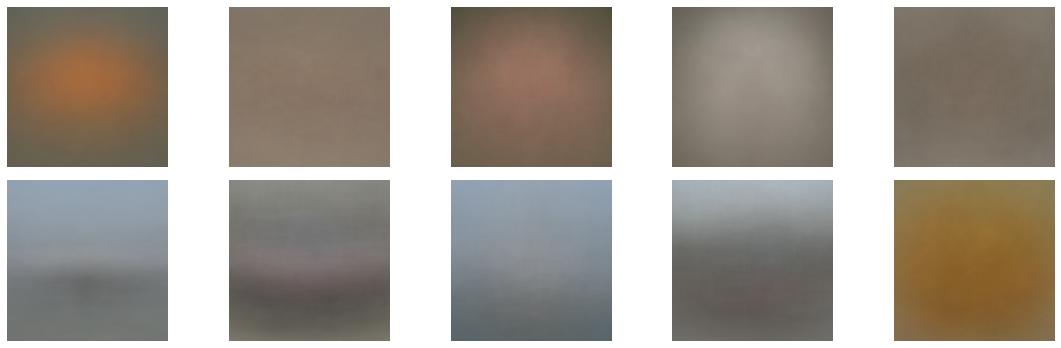

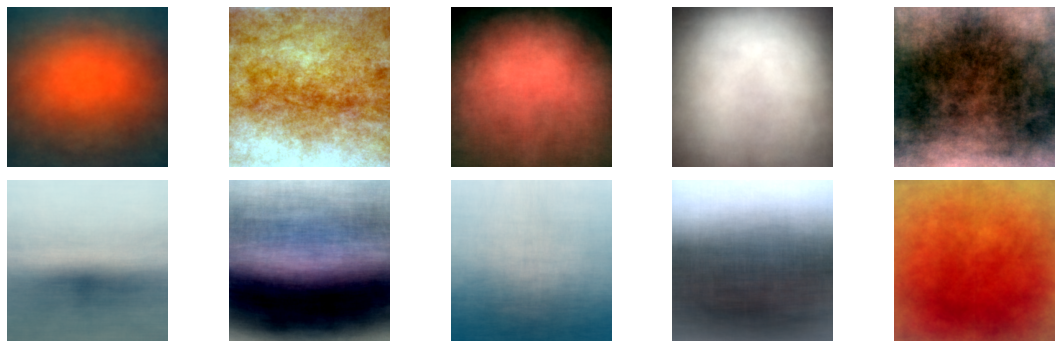

In [14]:
ave_data = np.load(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data.npy'), allow_pickle=True)
print('ImageNet: ',ave_data.shape)
figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
for i in range(10):
    show_img((torch.from_numpy(ave_data[i])), inv=True, transpose=True, axis=axes[i//5][i-i//5*5])
ave_data = np.load(os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data_proportion.npy'), allow_pickle=True)
print('ImageNet proportion: ',ave_data.shape)
figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
for i in range(10):
    show_img((torch.from_numpy(ave_data[i])), inv=True, transpose=True, axis=axes[i//5][i-i//5*5])

# topk activated average image

In [15]:
import os 
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np
from torchvision import datasets
import matplotlib.pyplot as plt
from utils import show_img
from models import load_pretrained_model

def topk_activations(model, dataset, topk=10):
    activate_results = []
    index = []
    for i in range(10):
        activate_results.append([])
        index.append([])
        
    with torch.no_grad():
        for i, (data, label) in enumerate(dataset):
            data = data.unsqueeze(0).cuda()
            logits = model(data)
            activate_results[label].append(logits[0][label].item())
            index[label].append(i)
            
    min_topks = []
    min_indexes = []
    max_topks = []
    max_indexes = []
    for i in range(10):
        argsort_activations = np.array(activate_results[i]).argsort()
        min_argsort = argsort_activations[:topk]
        max_argsort = argsort_activations[-topk:]
        
        min_topk = []
        max_topk = []
        min_index = []
        max_index = []
        for j in range(topk):
            min_index.append(index[i][min_argsort[j]])
            max_index.append(index[i][max_argsort[j]])
            min_topk.append(activate_results[i][min_argsort[j]])
            max_topk.append(activate_results[i][max_argsort[j]])
        min_topks.append(min_topk)
        max_topks.append(max_topk)
        min_indexes.append(min_index)
        max_indexes.append(max_index)
    return activate_results, index, min_indexes, min_topks, max_indexes, max_topks

def model_topk_activations(model_name, dataset, topk=10, save_path='./results', save=True):
    model = load_pretrained_model(model_name)
    model.eval()
    _, _, min_indexes, _, max_indexes, _ = topk_activations(model=model, dataset=dataset, topk=topk)
    min_images = []
    max_images = []
    for i in range(10):
        for j in range(topk):
            min_images.append(dataset[min_indexes[i][j]][0].numpy())
            max_images.append(dataset[max_indexes[i][j]][0].numpy())
    min_images = np.array(min_images)
    max_images = np.array(max_images)
    if save:
        np.save(os.path.join(save_path, 'min'+str(topk),'ave_data', model_name+'_activate_data.npy'), min_images)
        np.save(os.path.join(save_path, 'max'+str(topk),'ave_data', model_name+'_activate_data.npy'), max_images)
        print(model_name, 'average data saved.')
    return min_images, max_images

In [16]:
dataset = datasets.MNIST(
    root="./datasets",#路径
    train=True,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)

model_name_list = ['AlexNet_mnist','VGG11_mnist']
for model_name in model_name_list:
    model_topk_activations(model_name=model_name.lower(), dataset=dataset, topk=10, save_path='./results', save=True)

save_path = './results'
topk=10
for model_name in model_name_list:
    model_name = model_name.lower()
    min_data = np.load(os.path.join(save_path, 'min'+str(topk),'ave_data', model_name+'_activate_data.npy')).reshape((10,10,1,28,28))
    max_data = np.load(os.path.join(save_path, 'max'+str(topk),'ave_data', model_name+'_activate_data.npy')).reshape((10,10,1,28,28))
    np.save(os.path.join(save_path, 'min'+str(topk),'ave_data', model_name+'_ave_data.npy'), min_data.mean(axis=1))
    np.save(os.path.join(save_path, 'max'+str(topk),'ave_data', model_name+'_ave_data.npy'), max_data.mean(axis=1))

Load  AlexNet_mnist
alexnet_mnist average data saved.
Load  VGG11_mnist
vgg11_mnist average data saved.


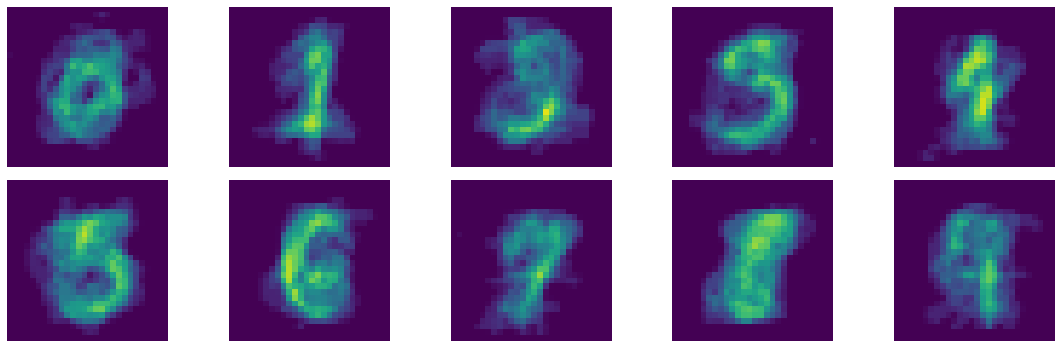

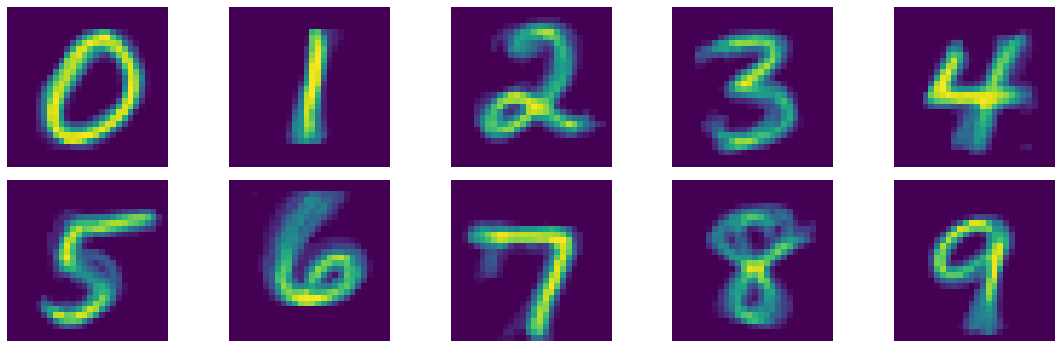

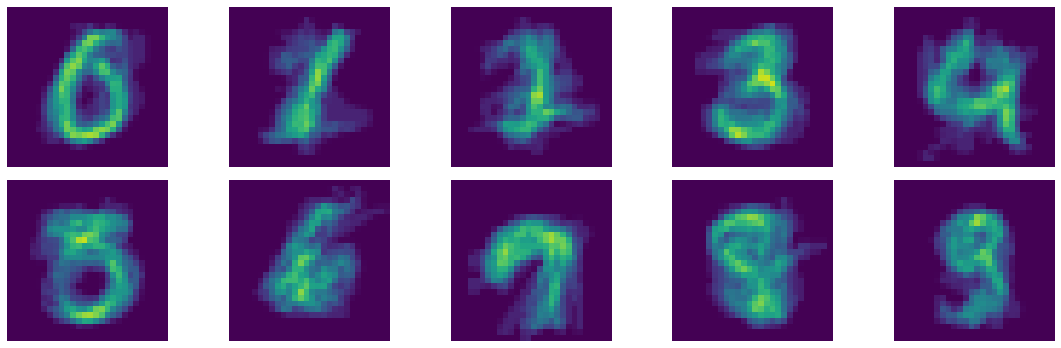

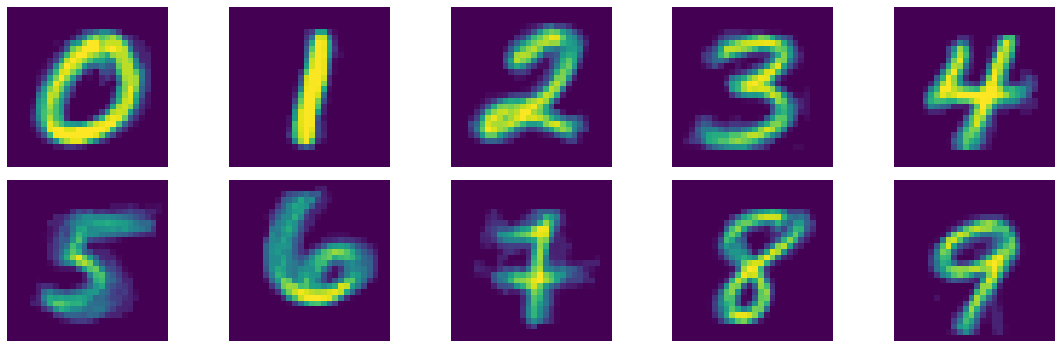

In [17]:
lists = ['AlexNet_mnist','VGG11_mnist']
save_path = './results'
for model_name in lists:
    model_name = model_name.lower()
    min_ave_data = np.load(os.path.join(save_path, 'min'+str(topk),'ave_data', model_name+'_ave_data.npy'), allow_pickle=True)
    max_ave_data = np.load(os.path.join(save_path, 'max'+str(topk),'ave_data', model_name+'_ave_data.npy'), allow_pickle=True)

    figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
    for i in range(10):
        show_img((torch.from_numpy(min_ave_data[i])), inv=False, transpose=True, axis=axes[i//5][i-i//5*5])
    figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
    for i in range(10):
        show_img((torch.from_numpy(max_ave_data[i])), inv=False, transpose=True, axis=axes[i//5][i-i//5*5])

In [18]:
dataset = datasets.CIFAR10(
    root="./datasets",#路径
    train=True,#训练集
    download=False,#是否下载
    transform=transforms.ToTensor()#数据预处理
)

model_name_list = ['AlexNet_cifar','VGG11_cifar']
for model_name in model_name_list:
    model_topk_activations(model_name=model_name.lower(), dataset=dataset, topk=10, save_path='./results', save=True)

save_path = './results'
topk=10
for model_name in model_name_list:
    model_name = model_name.lower()
    min_data = np.load(os.path.join(save_path, 'min'+str(topk),'ave_data', model_name+'_activate_data.npy')).reshape((10,10,3,32,32))
    max_data = np.load(os.path.join(save_path, 'max'+str(topk),'ave_data', model_name+'_activate_data.npy')).reshape((10,10,3,32,32))
    np.save(os.path.join(save_path, 'min'+str(topk),'ave_data', model_name+'_ave_data.npy'), min_data.mean(axis=1))
    np.save(os.path.join(save_path, 'max'+str(topk),'ave_data', model_name+'_ave_data.npy'), max_data.mean(axis=1))

Load  AlexNet_cifar
alexnet_cifar average data saved.
Load  VGG11_cifar
vgg11_cifar average data saved.


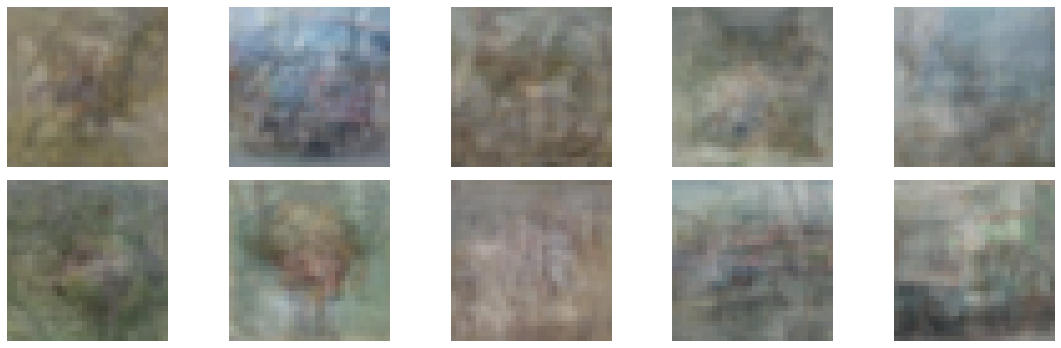

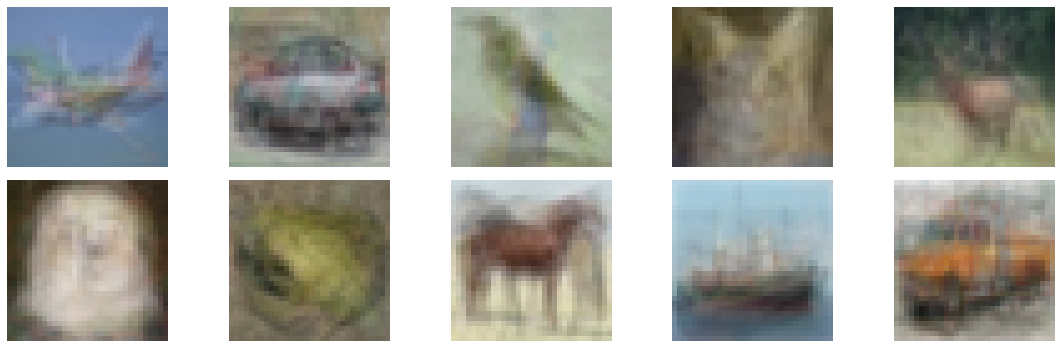

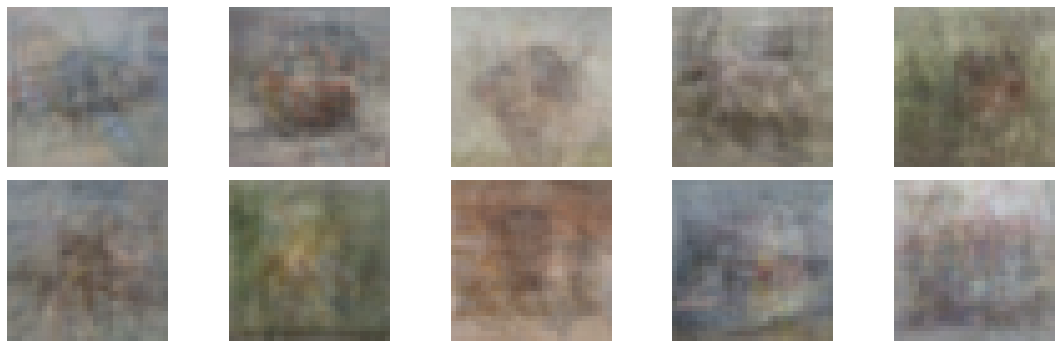

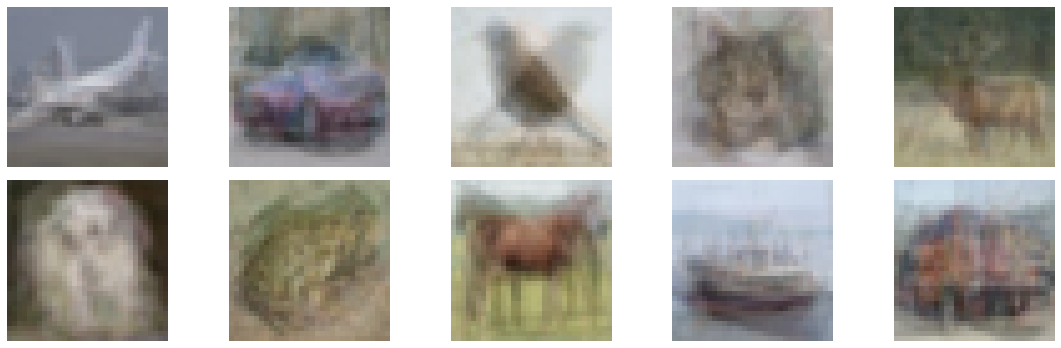

In [19]:
lists = ['AlexNet_cifar','VGG11_cifar']
save_path = './results'
for model_name in lists:
    model_name = model_name.lower()
    min_ave_data = np.load(os.path.join(save_path, 'min'+str(topk),'ave_data', model_name+'_ave_data.npy'), allow_pickle=True)
    max_ave_data = np.load(os.path.join(save_path, 'max'+str(topk),'ave_data', model_name+'_ave_data.npy'), allow_pickle=True)

    figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
    for i in range(10):
        show_img((torch.from_numpy(min_ave_data[i])), inv=False, transpose=True, axis=axes[i//5][i-i//5*5])
    figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
    for i in range(10):
        show_img((torch.from_numpy(max_ave_data[i])), inv=False, transpose=True, axis=axes[i//5][i-i//5*5])

In [20]:
data_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])]
    )
dataset =torchvision.datasets.ImageFolder(root='./datasets/ImageNet/train',transform=data_transform)

model_name_list = ['AlexNet_imagenet','VGG11_imagenet']
for model_name in model_name_list:
    model_topk_activations(model_name=model_name.lower(), dataset=dataset, topk=10, save_path='./results', save=True)

save_path = './results'
topk=10
for model_name in model_name_list:
    model_name = model_name.lower()
    min_data = np.load(os.path.join(save_path, 'min'+str(topk),'ave_data', model_name+'_activate_data.npy')).reshape((10,10,3,224,224))
    max_data = np.load(os.path.join(save_path, 'max'+str(topk),'ave_data', model_name+'_activate_data.npy')).reshape((10,10,3,224,224))
    np.save(os.path.join(save_path, 'min'+str(topk),'ave_data', model_name+'_ave_data.npy'), min_data.mean(axis=1))
    np.save(os.path.join(save_path, 'max'+str(topk),'ave_data', model_name+'_ave_data.npy'), max_data.mean(axis=1))

Load  AlexNet_imagenet
alexnet_imagenet average data saved.
Load  VGG11_imagenet
vgg11_imagenet average data saved.


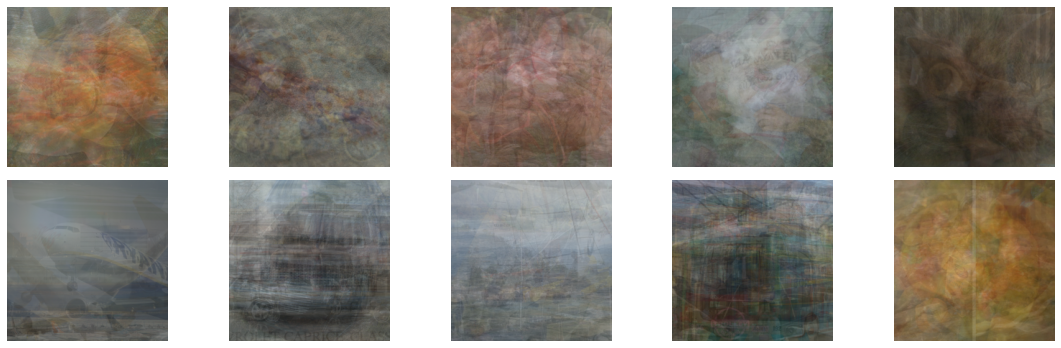

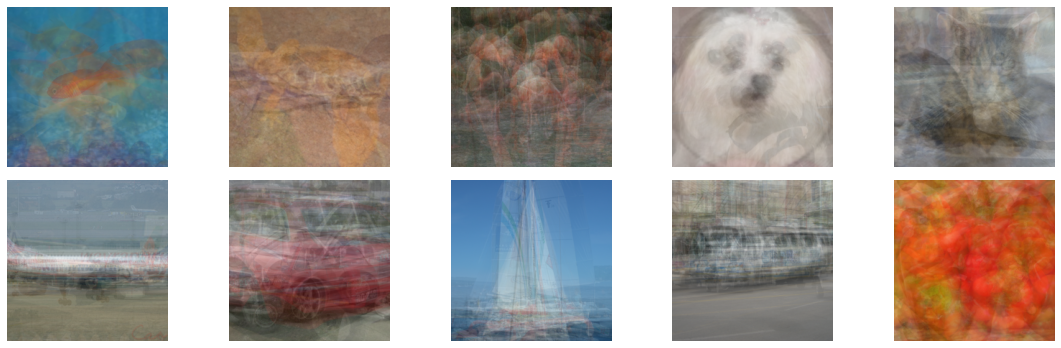

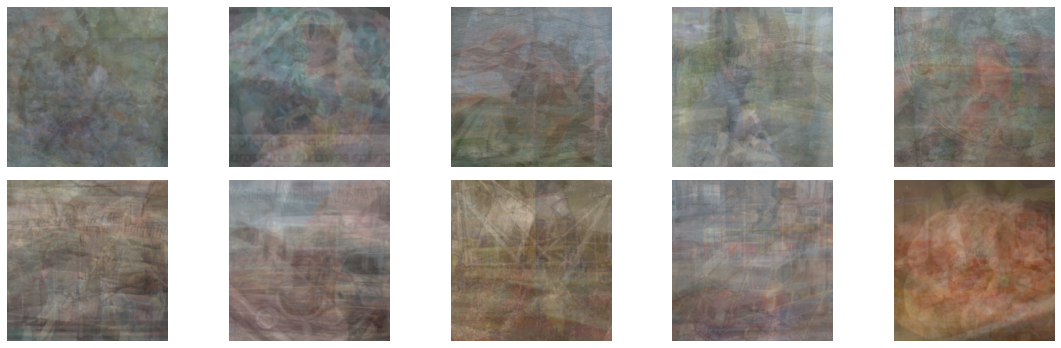

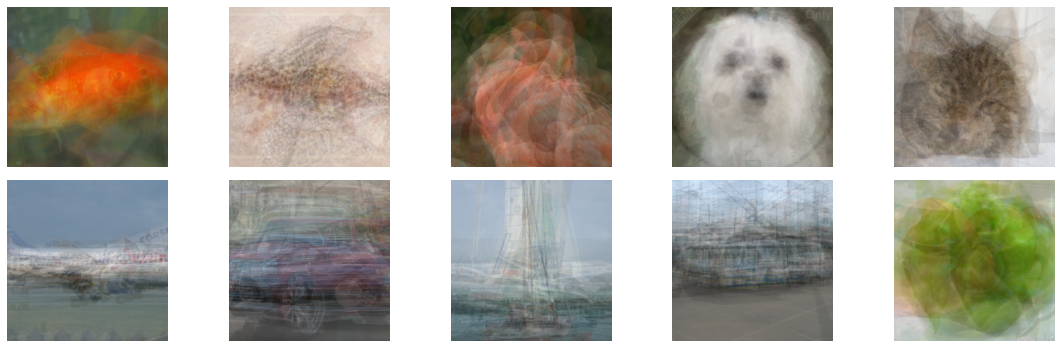

In [21]:
lists = ['AlexNet_imagenet','VGG11_imagenet']
save_path = './results'

for model_name in lists:
    model_name = model_name.lower()
    min_ave_data = np.load(os.path.join(save_path, 'min'+str(topk),'ave_data', model_name+'_ave_data.npy'), allow_pickle=True)
    max_ave_data = np.load(os.path.join(save_path, 'max'+str(topk),'ave_data', model_name+'_ave_data.npy'), allow_pickle=True)
    figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
    for i in range(10):
        show_img((torch.from_numpy(min_ave_data[i])), inv=True, transpose=True, axis=axes[i//5][i-i//5*5])
    figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
    for i in range(10):
        show_img((torch.from_numpy(max_ave_data[i])), inv=True, transpose=True, axis=axes[i//5][i-i//5*5])

# max activation optimizaiton

In [1]:
import os
import torch
import torch.nn as nn
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_imagenet_img, make_grayscale, make_black_white, show_mask_on_image, cut_image_with_mask, show_img
from models import load_pretrained_model
%matplotlib inline

def load_ave_data(model_name, save_path='./results'):
    ave_data_path = os.path.join(save_path, 'ave','ave_data', model_name+'_ave_data_proportion.npy')
    ave_data = np.load(ave_data_path, allow_pickle=True)
    return ave_data

def test_ave_data(ave_data, model, show=False):
    softmax_l = []
    model.eval()
    with torch.no_grad():
        image_tensor = torch.from_numpy(ave_data).type(torch.FloatTensor).cuda()
        logits = model(image_tensor)
        acc = nn.functional.softmax(logits, dim=1)
        acc = acc.cpu().numpy()
        np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
        softmax_l.append(acc)
        if show:
            print(acc)
    return np.array(softmax_l)[0]

def ave_data_max_activation(ave_data, model, steps=5000, learning_rate=1e-3, threshold=1e-6, show=False):
    maximized_ave_data = []
    for i in range(ave_data.shape[0]):  
        target_class = i
        image_tensor = torch.from_numpy(ave_data[i]).type(torch.FloatTensor).unsqueeze(0).cuda()
        image_tensor.requires_grad = True
        image_tensor.retain_grad()
        image_tensor = nn.Parameter(image_tensor)
        
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam([image_tensor], lr=learning_rate, weight_decay=1e-5)
        
        target_class_tensor = torch.from_numpy(np.array([target_class])).to(torch.int64) .cuda()
        
        min_loss = 10000
        maximum = image_tensor.clone()
        for j in range(steps):
            
            logits = model(image_tensor)
            target = torch.zeros_like(logits).cuda()
            loss = loss_fn(logits, target_class_tensor)
            if show:
                if j % (steps // 100) == 0:
                    print('step:{0} loss:{1:8.7f} logit:{2:8.7f}'.format(j, loss.item(), logits[0][target_class].item()))
            if loss < min_loss:
                min_loss = loss
                maximum = image_tensor.clone()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if loss < threshold:
                break
        print('Target class:{0} min loss:{1:8.7f}'.format(i, min_loss.item()))
        maximized_ave_data.append(maximum[0].detach().cpu().numpy())
    return np.array(maximized_ave_data)

def max_activate(model_name_list, threshold_list, show=False, steps=5000, save_path='./results'):
    for model_i in range(len(model_name_list)):
        model_name = model_name_list[model_i].lower()
        model = load_pretrained_model(model_name)
        model.eval()
        ave_data = load_ave_data(model_name=model_name)
        
        maximized_ave_data = ave_data_max_activation(ave_data, model, steps=steps, learning_rate=1e-3, threshold=threshold_list[model_i], show=show)
        np.save(os.path.join(save_path, 'optimized','ave_data', model_name+'_ave_data.npy'), maximized_ave_data)
        
        ave_data_result = test_ave_data(ave_data, model)
        plt.figure(figsize=(8, 6))
        sns.heatmap(ave_data_result, annot=True, fmt='.2f')
        plt.title('平均图像分类置信度热力图')
        plt.show()
        
        maximized_result = test_ave_data(maximized_ave_data, model)
        plt.figure(figsize=(8, 6))
        sns.heatmap(maximized_result, annot=True, fmt='.2f')
        plt.title('平均图像分类置信度热力图')
        plt.show()

Load  AlexNet_mnist
Target class:0 min loss:0.0000010
Target class:1 min loss:0.0000010
Target class:2 min loss:0.0000010
Target class:3 min loss:0.0000010
Target class:4 min loss:0.0000010
Target class:5 min loss:0.0020802
Target class:6 min loss:0.0000014
Target class:7 min loss:0.0000010
Target class:8 min loss:0.0000031
Target class:9 min loss:0.0000048


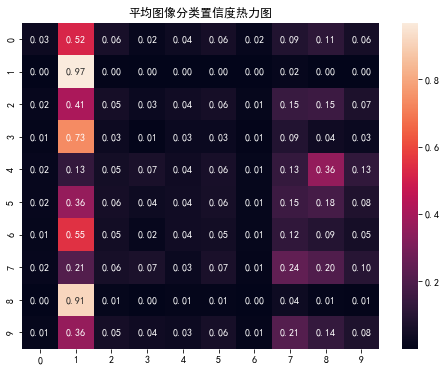

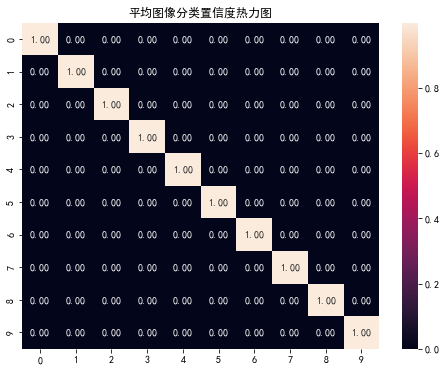

Load  VGG11_mnist
Target class:0 min loss:0.0000063
Target class:1 min loss:0.0000025
Target class:2 min loss:0.0000083
Target class:3 min loss:0.0000168
Target class:4 min loss:0.0000054
Target class:5 min loss:0.0000077
Target class:6 min loss:0.0000044
Target class:7 min loss:0.0000086
Target class:8 min loss:0.0000017
Target class:9 min loss:0.0000132


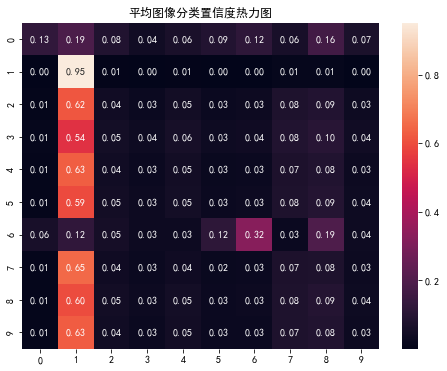

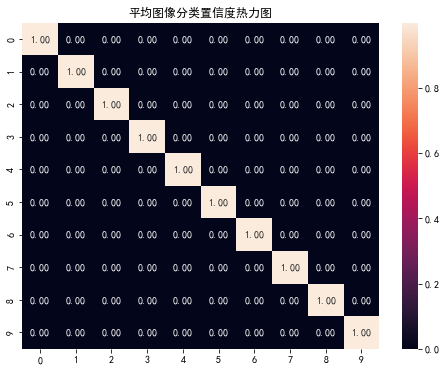

Load  AlexNet_cifar
Target class:0 min loss:0.0000024
Target class:1 min loss:0.0000443
Target class:2 min loss:0.0000010
Target class:3 min loss:0.0000010
Target class:4 min loss:0.0000010
Target class:5 min loss:0.0000010
Target class:6 min loss:0.0000010
Target class:7 min loss:0.0000010
Target class:8 min loss:0.0000010
Target class:9 min loss:0.0000050


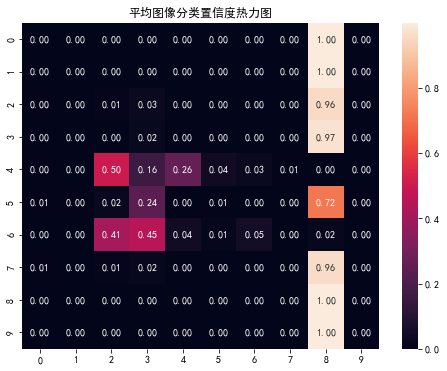

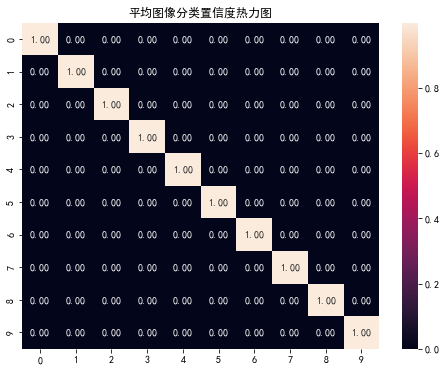

Load  VGG11_cifar
Target class:0 min loss:0.0000128
Target class:1 min loss:0.0000439
Target class:2 min loss:0.0000038
Target class:3 min loss:0.0000012
Target class:4 min loss:0.0000012
Target class:5 min loss:0.0000057
Target class:6 min loss:0.0000069
Target class:7 min loss:0.0000069
Target class:8 min loss:0.0000010
Target class:9 min loss:0.0000080


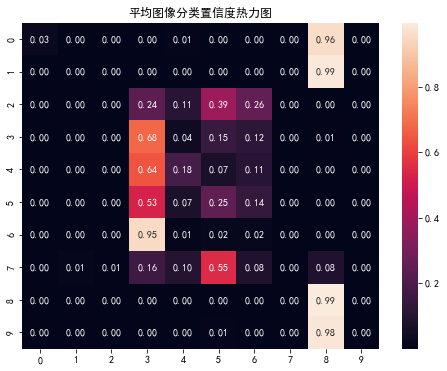

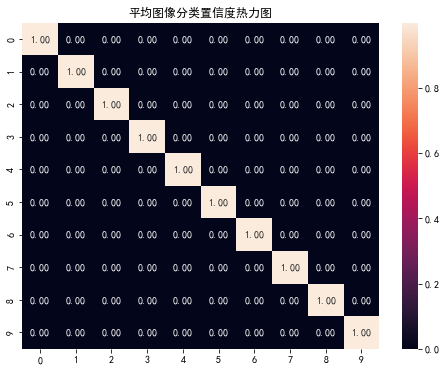

Load  AlexNet_imagenet
Target class:0 min loss:0.0000010
Target class:1 min loss:0.0001951
Target class:2 min loss:0.0000929
Target class:3 min loss:0.0000108
Target class:4 min loss:0.0000376
Target class:5 min loss:0.0001105
Target class:6 min loss:0.0001463
Target class:7 min loss:0.0000339
Target class:8 min loss:0.0000588
Target class:9 min loss:0.0000577


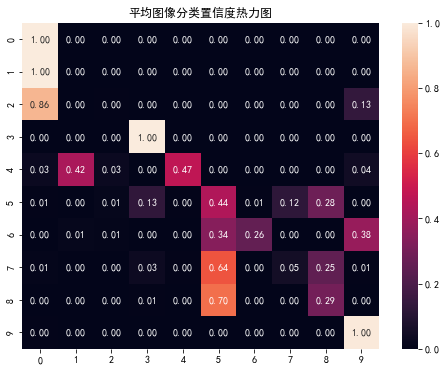

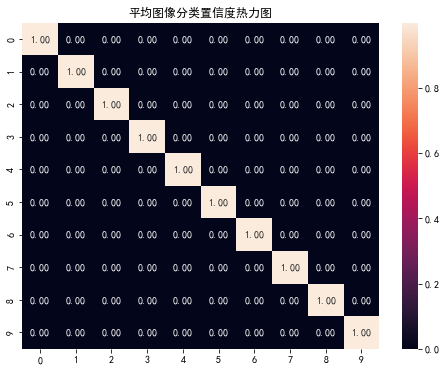

Load  VGG11_imagenet
Target class:0 min loss:0.0000000
Target class:1 min loss:0.0011714
Target class:2 min loss:0.0009701
Target class:3 min loss:0.0013618
Target class:4 min loss:0.0014108
Target class:5 min loss:0.0006483
Target class:6 min loss:0.0008224
Target class:7 min loss:0.0009214
Target class:8 min loss:0.0004718
Target class:9 min loss:0.0073692


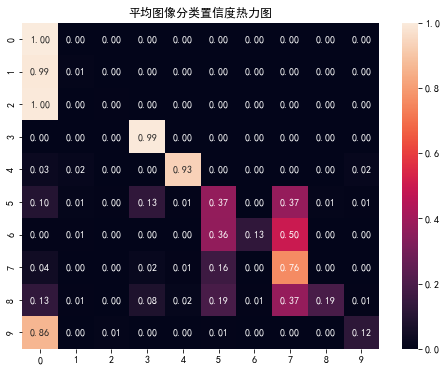

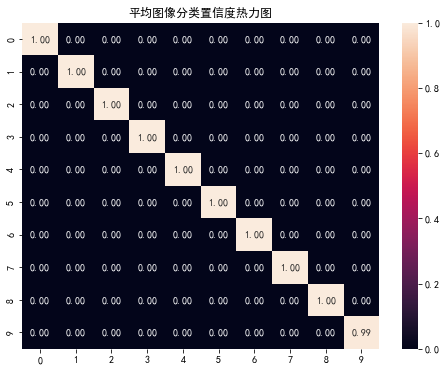

In [2]:
model_name_list = ['AlexNet_mnist','VGG11_mnist',
                   'AlexNet_cifar','VGG11_cifar',
                   'AlexNet_imagenet','VGG11_imagenet']
threshold_list = [1e-6, 1e-6, 1e-6]*3

max_activate(model_name_list, threshold_list, steps=5000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

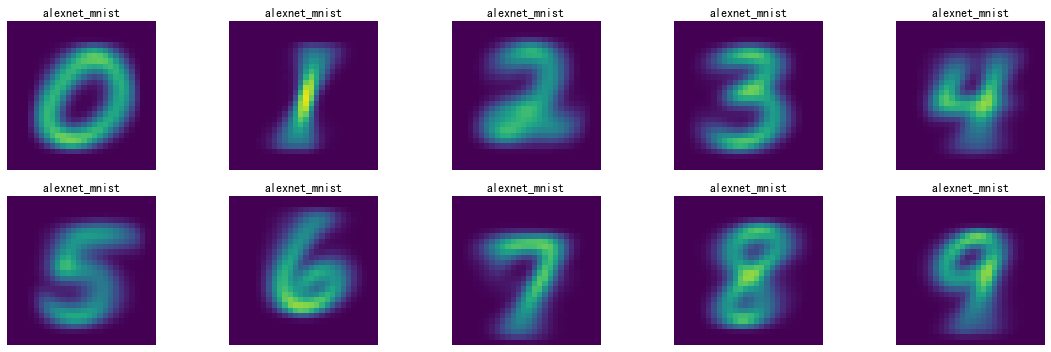

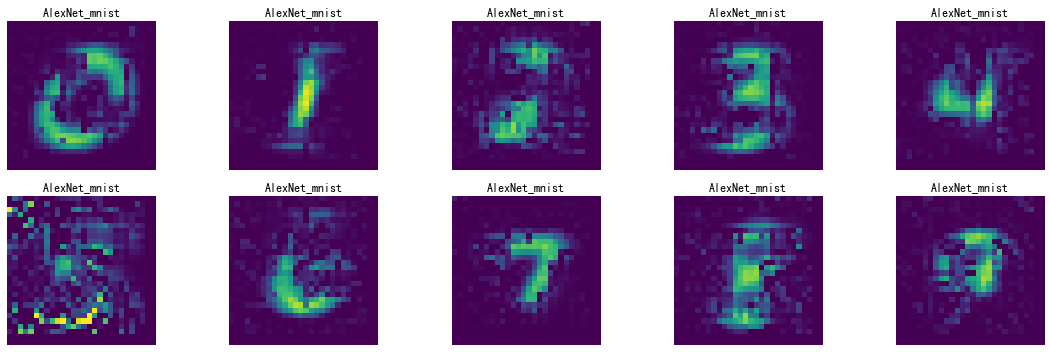

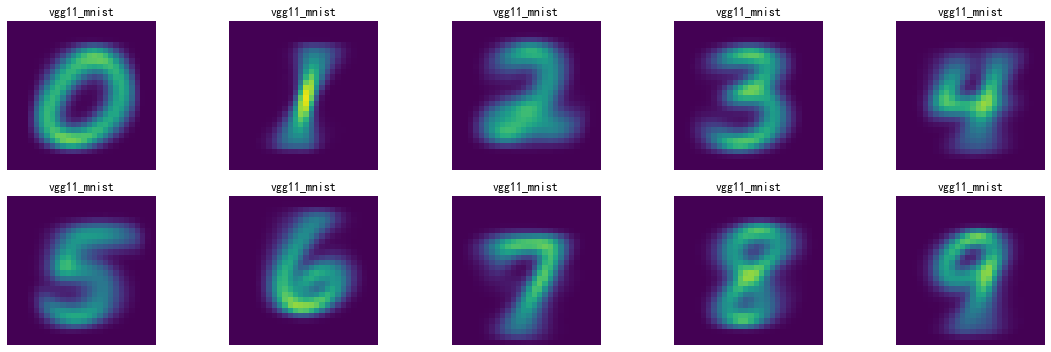

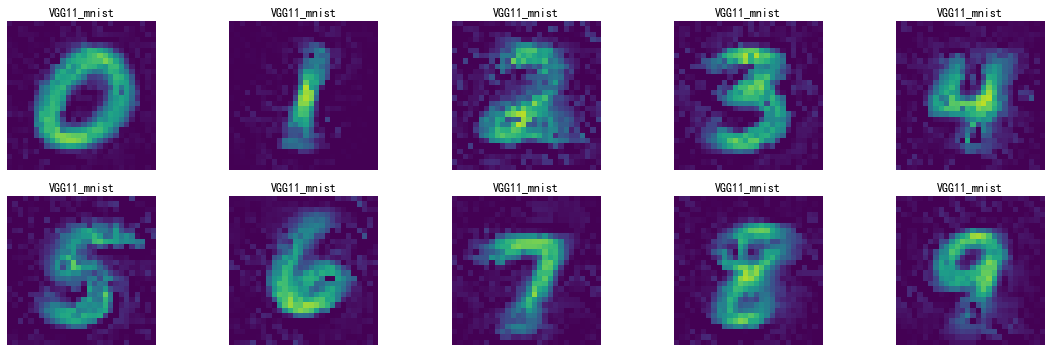

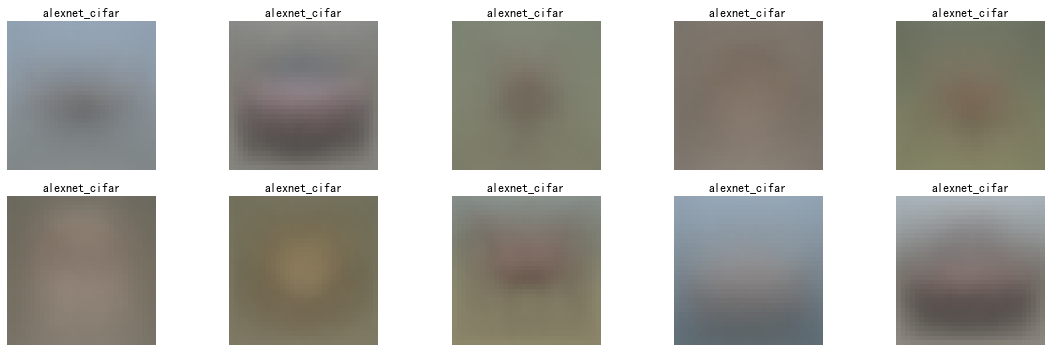

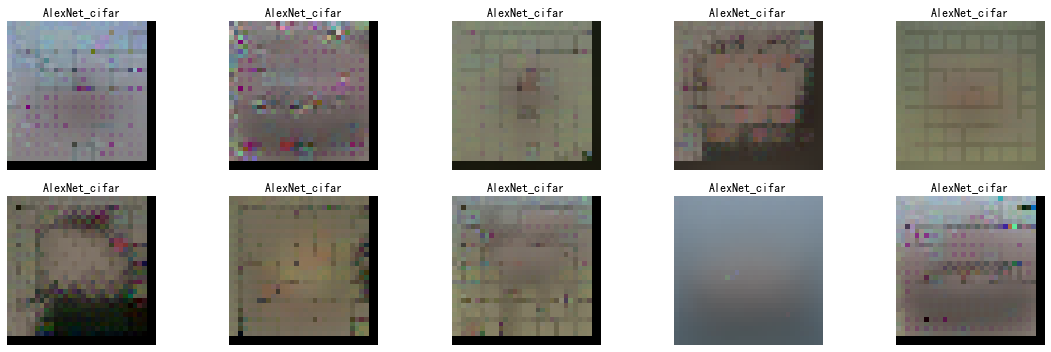

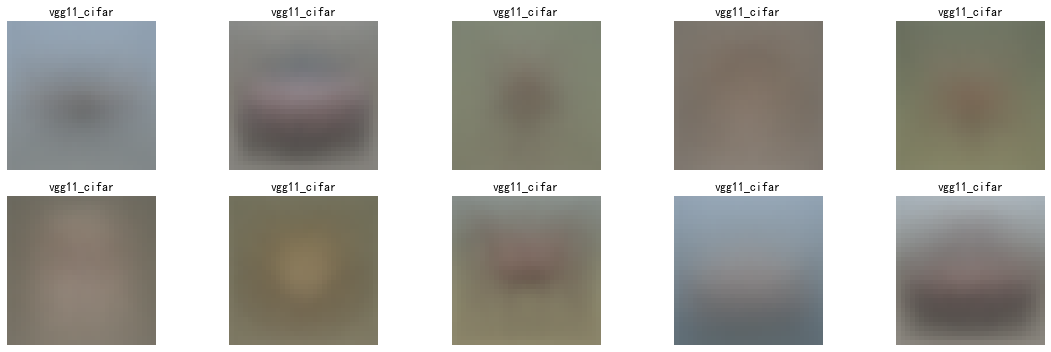

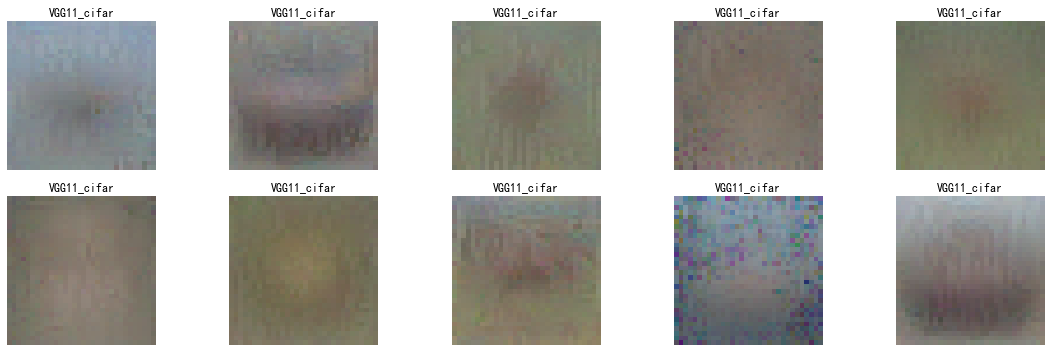

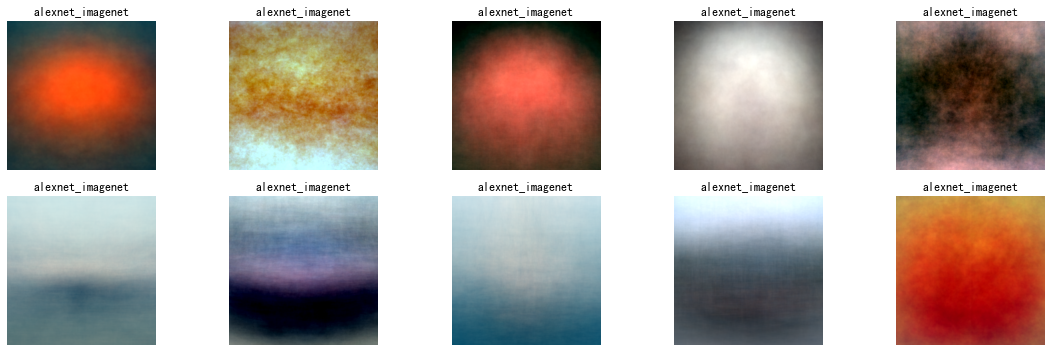

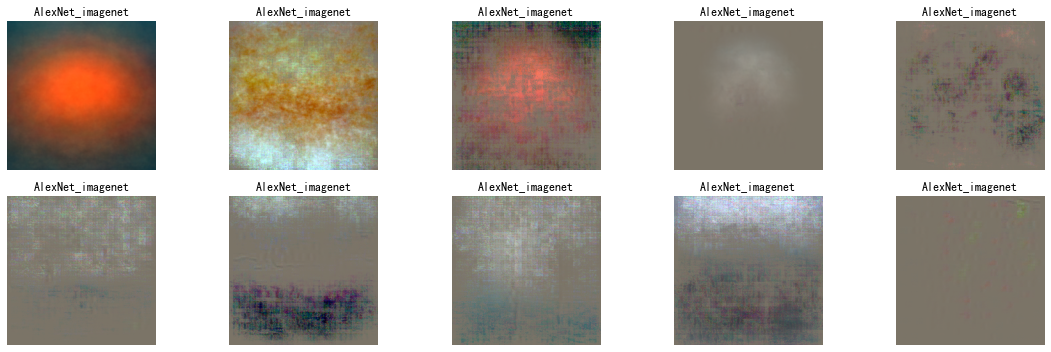

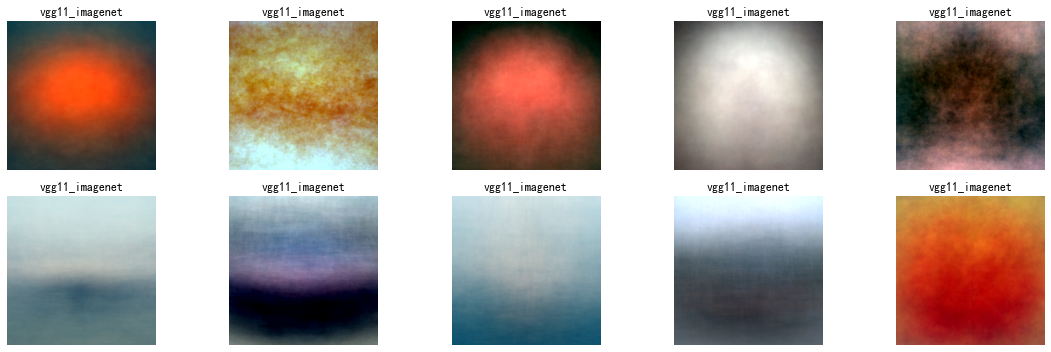

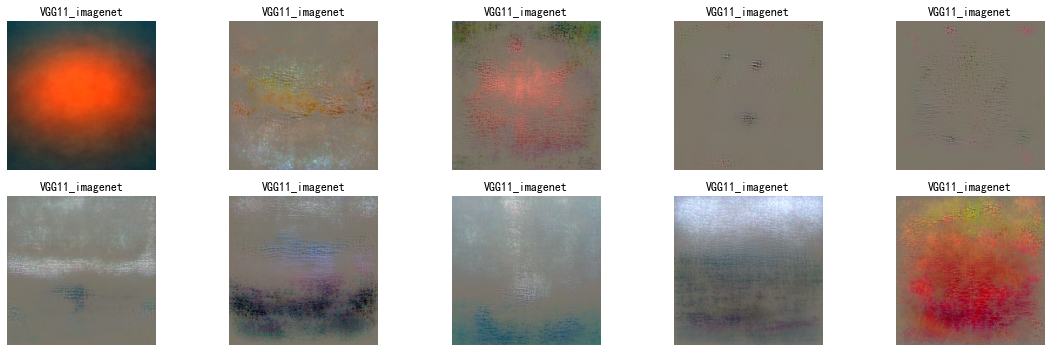

In [3]:
model_name_list = ['AlexNet_mnist','VGG11_mnist',
                   'AlexNet_cifar','VGG11_cifar',
                   'AlexNet_imagenet','VGG11_imagenet']

for model_i in range(len(model_name_list)):
    model_name = model_name_list[model_i].lower()
    ave_data = load_ave_data(model_name=model_name)
    figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
    inv = True if model_i>3 else False
    for i in range(10):
        show_img((torch.from_numpy(ave_data[i])), title=model_name, inv=inv, transpose=True, axis=axes[i//5][i-i//5*5])
        
    maximized_ave_data = np.load(os.path.join('./results', 'optimized','ave_data', model_name+'_ave_data.npy'), allow_pickle=True)    
    figure, axes = plt.subplots(2, 5, figsize=(16, 5), tight_layout=True)
    for i in range(10):
        show_img((torch.from_numpy(maximized_ave_data[i])), title=model_name_list[model_i], inv=inv, 
                     transpose=True, axis=axes[i//5][i-i//5*5])